Ampliaciones

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
def remove_entries(df, n, col, element_name):
    nb_counts = Counter(df[col])
    inicial = df.shape[0]

    for i in list(nb_counts):
        if nb_counts[i] < n:
            del nb_counts[i]
            df = df[df[col] != i]

    tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
    ax = tdf.plot(kind='bar', figsize = (22,4), color = '#007A87', alpha = 0.85)
    ax.set_title(f"{element_name} por número de registros")
    ax.set_xlabel(f"{element_name}")
    ax.set_ylabel("# de registros")

    plt.show()

    print('Número de registros eliminado: ', inicial - df.shape[0])
    print(f"Número de {element_name}s:", len(nb_counts))
    
    return df

In [3]:
def calc_smooth_mean(df, by, on, m):

    mean = df[on].mean()

    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    smooth = (counts * means + m * mean) / (counts + m)

    return df[by].map(smooth)

In [5]:
import pandas as pd
from datetime import datetime

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv('./train.csv', sep=';', decimal='.')

not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df.drop(not_useful_columns, axis=1, inplace=True)
df.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)
df.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)
df.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

reviews = df.loc[: , "Review Scores Rating":"Review Scores Value"]
df['Average Review'] = reviews.mean(axis=1)

df.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)

df = df[df['Price'] < 200]

df["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df["Neighbourhood Cleansed"])
df.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

df['Features'].fillna("", inplace=True)
df['Amenities'].fillna("", inplace=True)
df['Host Verifications'].fillna("", inplace=True)

df['Features'] = df['Features'].apply(lambda x: len(str(x).split(',')))
df['Amenities'] = df['Amenities'].apply(lambda x: len(str(x).split(',')))
df['Host Verifications'] = df['Host Verifications'].apply(lambda x: len(str(x).split(',')))

# Eliminar filas con valores nulos en la columna 'Host Since'
df = df.dropna(subset=['Host Since'])

# Convertir la columna 'Host Since' a objetos datetime
df['Host Since'] = pd.to_datetime(df['Host Since'], errors='coerce')

df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)
df.drop(['Host Since'], axis=1, inplace=True)

df["Host Response Time"].fillna(df["Host Response Time"].mode()[0], inplace=True)
df.drop(['Experiences Offered'], axis=1, inplace=True)
df.drop(['City', 'Country Code'], axis=1, inplace=True)

print(df.shape)

(11282, 26)


Reducción de ruido

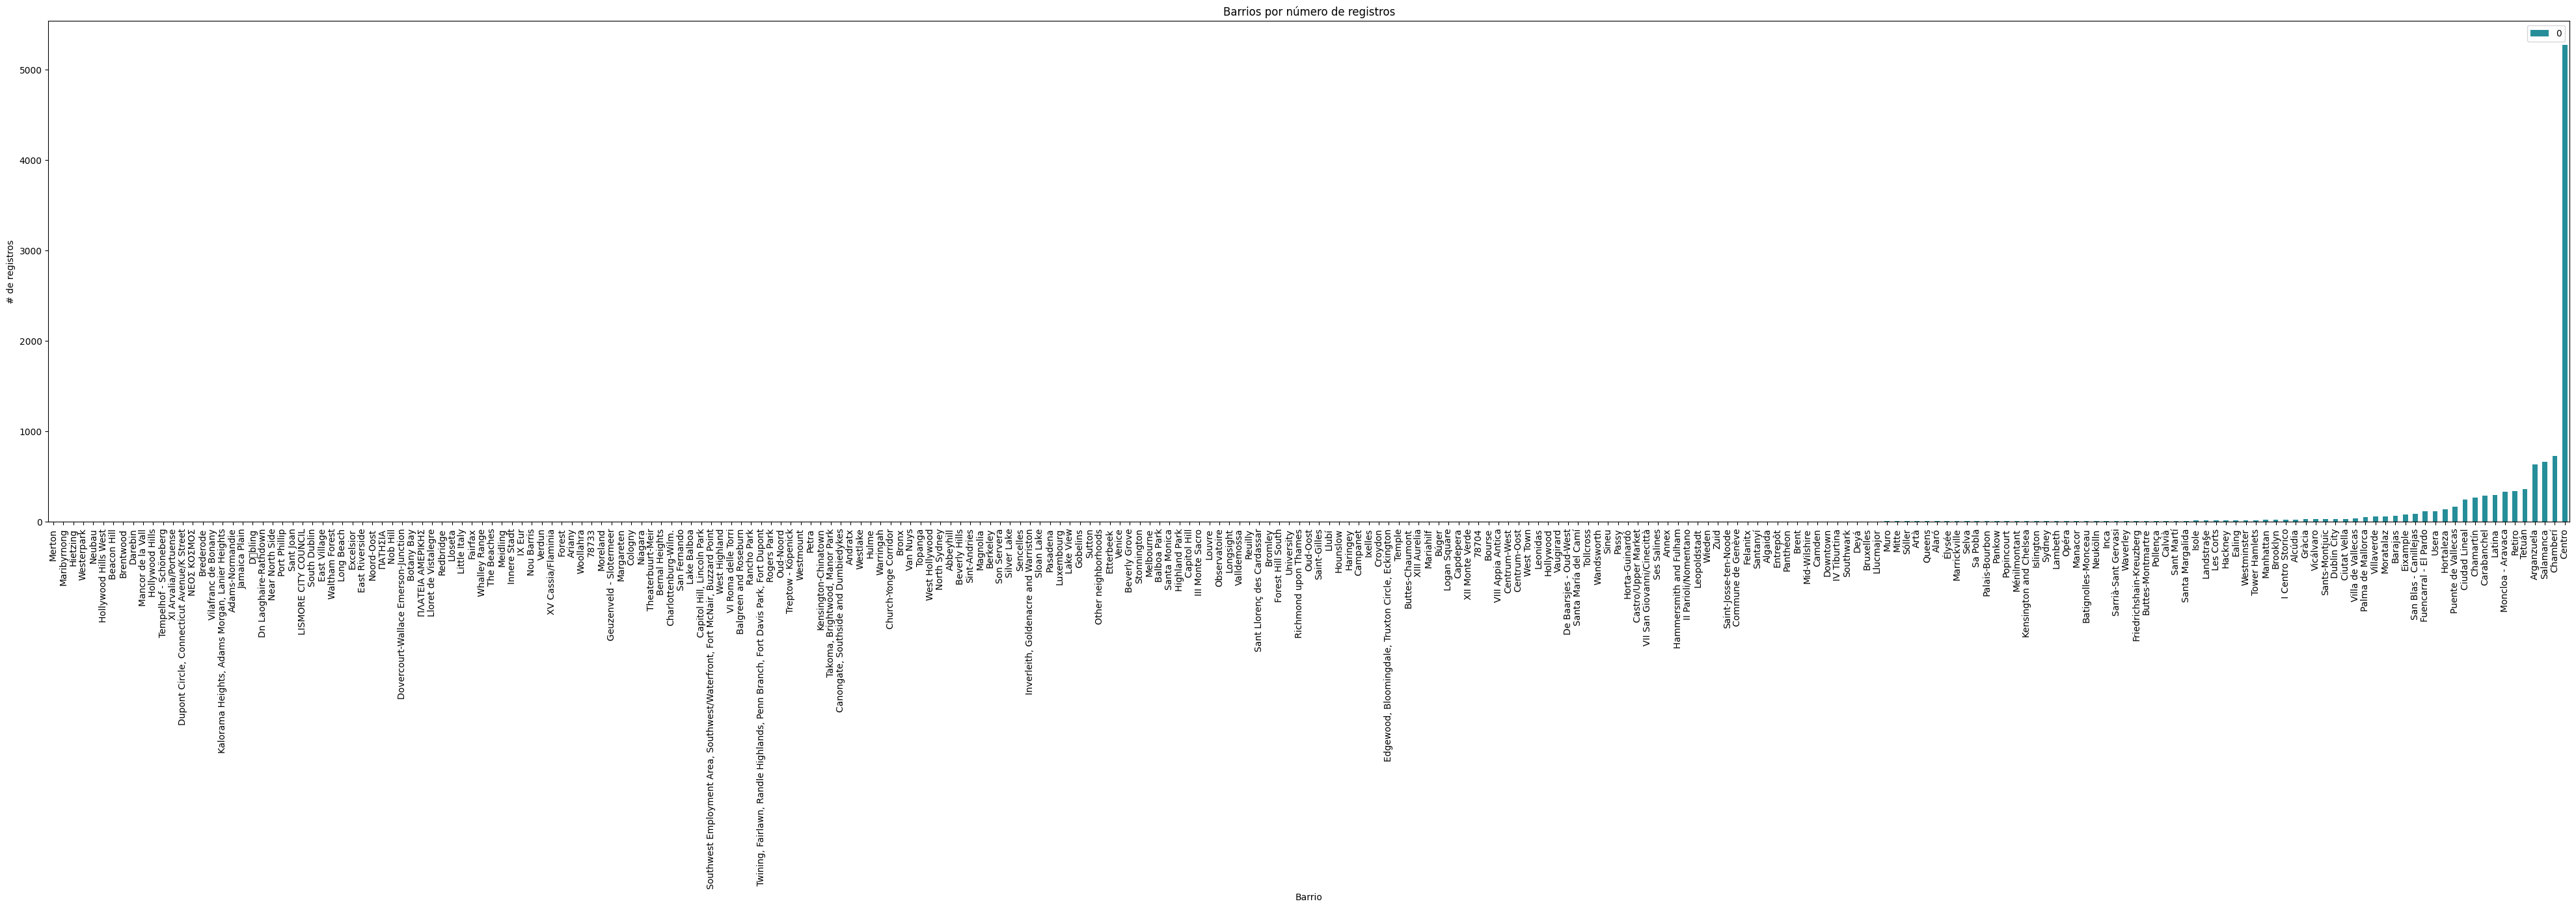

Número de barrios: 253


In [6]:
from collections import Counter

nb_counts = Counter(df["Final Neighbourhood"])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)


ax = tdf.plot(kind='bar', figsize = (50,10), color = '#007A87', alpha = 0.85)
ax.set_title("Barrios por número de registros")
ax.set_xlabel("Barrio")
ax.set_ylabel("# de registros")
plt.show()

print("Número de barrios:", len(nb_counts))

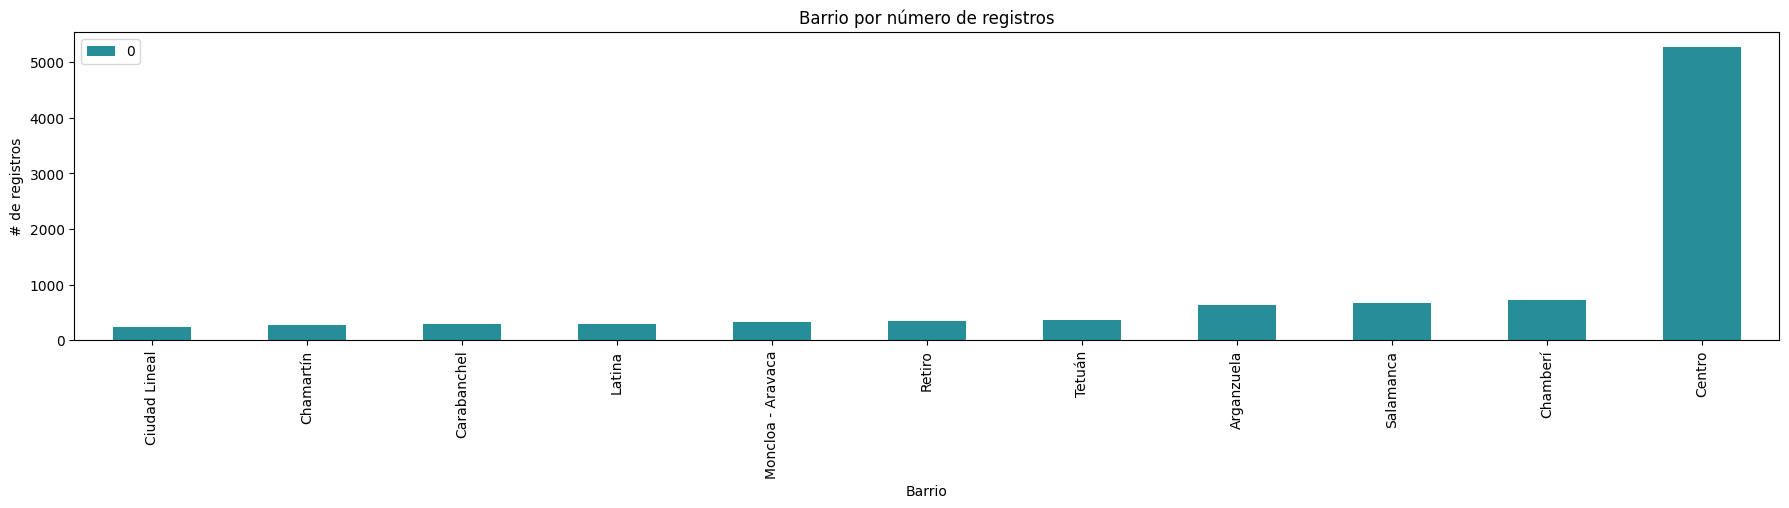

Número de registros eliminado:  1848
Número de Barrios: 11


In [7]:
df = remove_entries(df, 200, "Final Neighbourhood", "Barrio")

In [8]:
df["Property Type"].value_counts()

Property Type
Apartment             7903
House                  642
Bed & Breakfast        232
Condominium            226
Loft                   201
Other                  132
Dorm                    32
Guesthouse              24
Hostel                  12
Chalet                   6
Boutique hotel           5
Serviced apartment       4
Townhouse                4
Casa particular          3
Villa                    2
Earth House              2
Guest suite              1
Tent                     1
Camper/RV                1
Bungalow                 1
Name: count, dtype: int64

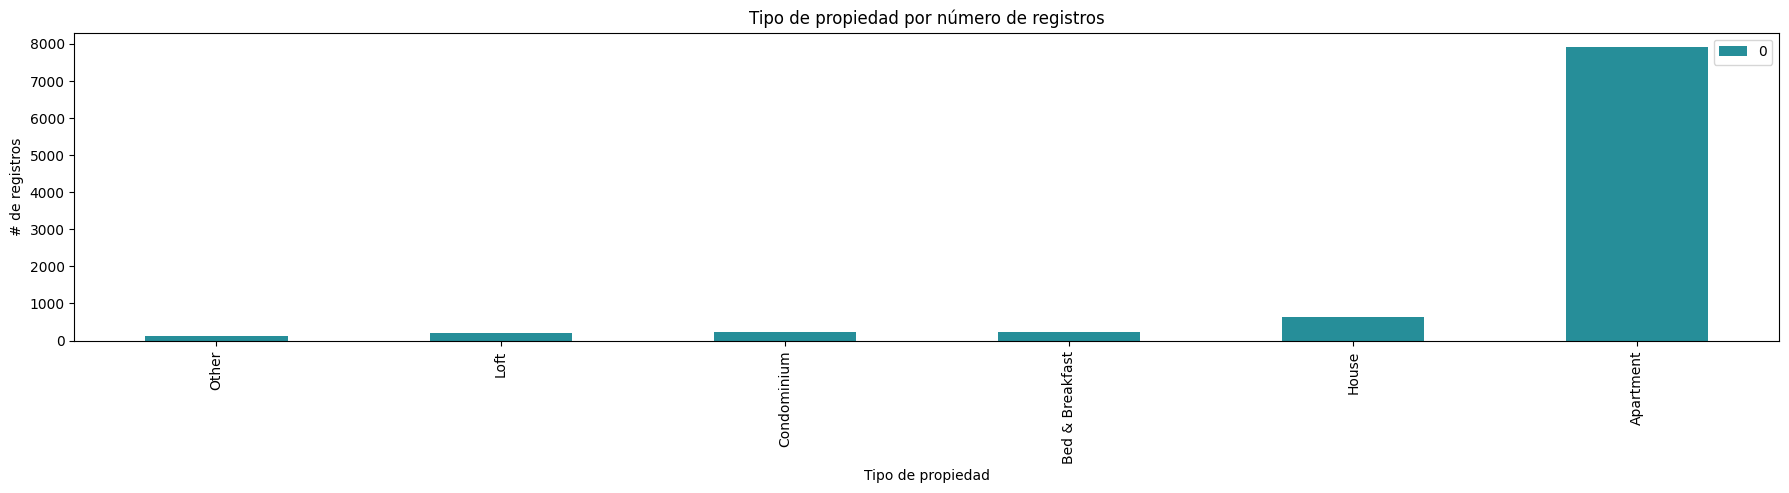

Número de registros eliminado:  98
Número de Tipo de propiedads: 6


In [9]:
df = remove_entries(df, 100, "Property Type", "Tipo de propiedad")

In [10]:
df["Bed Type"].value_counts()

Bed Type
Real Bed         9118
Pull-out Sofa     172
Futon              31
Couch              11
Airbed              4
Name: count, dtype: int64

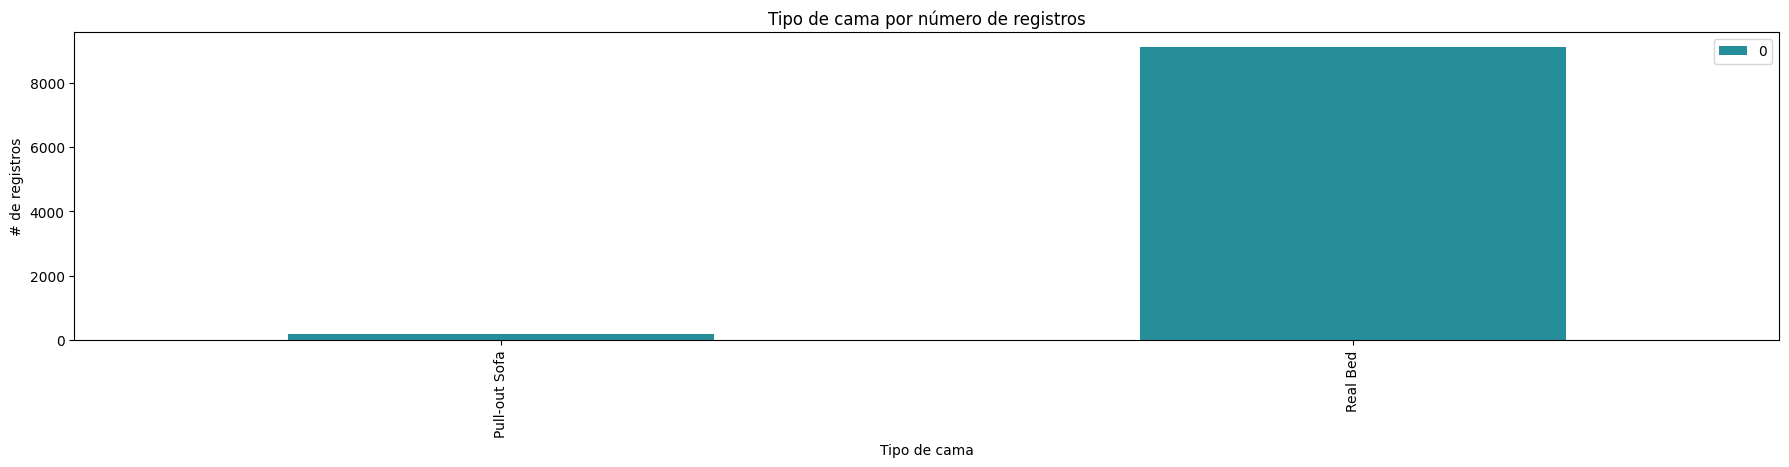

Número de registros eliminado:  46
Número de Tipo de camas: 2


In [11]:
df = remove_entries(df, 100, "Bed Type", "Tipo de cama")

In [12]:
df["Room Type"].value_counts()

Room Type
Entire home/apt    5739
Private room       3451
Shared room         100
Name: count, dtype: int64

In [13]:
df["Cancellation Policy"].value_counts()

Cancellation Policy
strict             3524
flexible           2895
moderate           2865
super_strict_60       4
super_strict_30       2
Name: count, dtype: int64

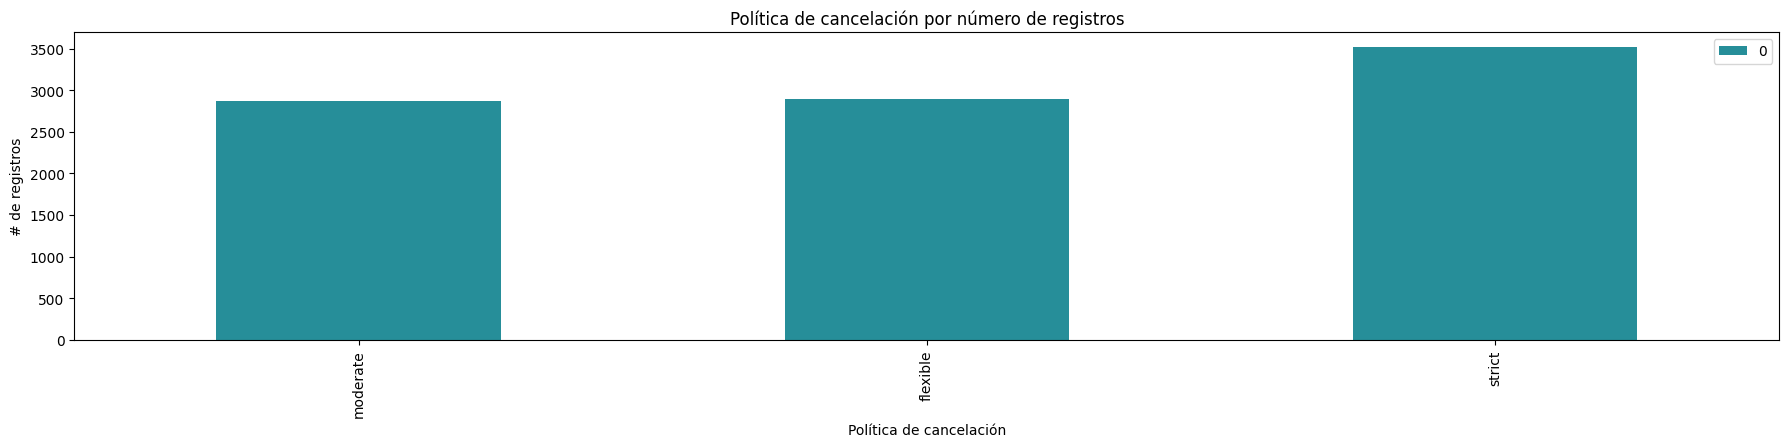

Número de registros eliminado:  6
Número de Política de cancelacións: 3


In [14]:
df = remove_entries(df, 100, "Cancellation Policy", "Política de cancelación")

In [15]:
categorical = ['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy',
 'Final Neighbourhood'
]

for c in categorical:
    df[c] = calc_smooth_mean(df, by=c, on='Price', m=300)

cols = df.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df = df[cols]

df.fillna(df.mean(), inplace=True)

df.shape

(9284, 26)